## **Marketing Campaign Analysis**
***

### **1. Data Overview & Preprocessing**
- The dataset is loaded from marketing.csv.
- Columns date_served, date_subscribed, and date_canceled were converted to datetime objects for accurate time-based analysis.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

marketing = pd.read_csv('marketing.csv')
marketing['date_served'] = pd.to_datetime(marketing['date_served'], format='%m/%d/%y')
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'], format='%m/%d/%y')
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'], format='%m/%d/%y')
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  
0           NaT           House Ads        True  
1           NaT       

***
### **2. User Engagement Analysis**
- A daily active users plot was generated to assess marketing reach over time.
- Understanding daily fluctuations helps to identify trends and evaluate the consistency of engagement.

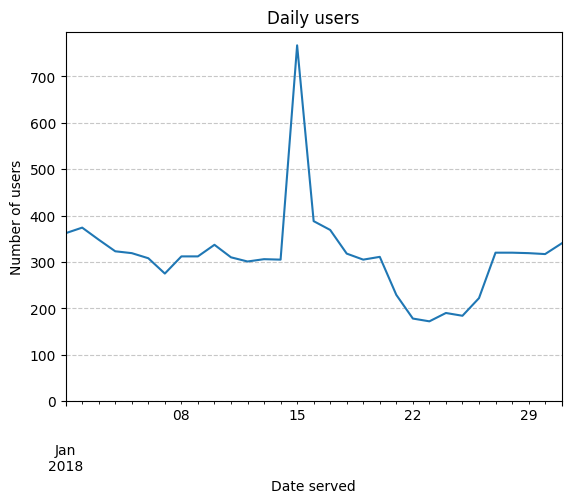

In [2]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

daily_users.plot()
plt.title('Daily users')
plt.ylabel('Number of users')
plt.xlabel('Date served')
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**
- User engagement is uneven.
- Highest engagement is on 15 Jan - mid of month.

***
### **3. Conversion Rate**
**Definition:** Conversion rate is the percentage of users who saw marketing assets and subsequently became subscribers.


In [3]:
total = marketing['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
conversion_rat = subscribers/total
print("Conversion Rate = ", round(conversion_rat*100, 2), "%")

Conversion Rate =  13.89 %


**Observation:**
- A low conversion rate indicates ineffective campaign messaging or targeting.


***
### **4. Retention Rate**
**Definition:** Retention rate is the percentage of converted users who remained engaged after subscribing.


In [4]:
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
retention_rate = retained / total_subscribers
print("Retention Rate = ",round(retention_rate*100, 2), "%")

Retention Rate =  66.8 %


**Observation:**
- Low retention rates suggests possible issues with user experience.

***
### **5. Daily Conversion Rate**</br>
To check if the conversion rate varies based on when users saw an ad, the conversion rate for each day is calculated and plotted to identify any trends or patterns over time.

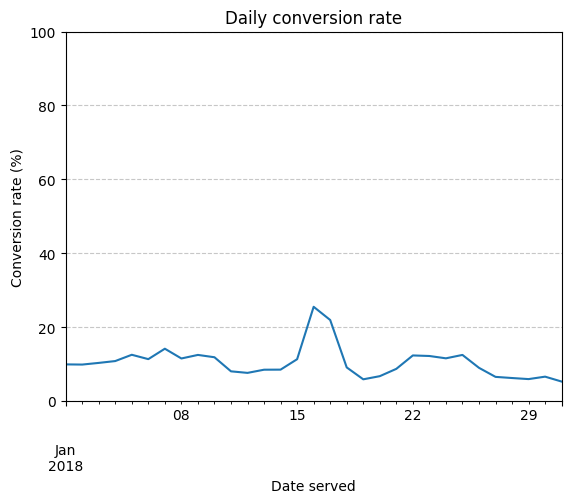

In [5]:
# Define a function for calculating conversion rate
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate = round(column_conv/column_total*100,2)
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

daily_conversion_rate = conversion_rate(marketing, 'date_served')

daily_conversion_rate.plot()
plt.title('Daily conversion rate')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Date served')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(plt.ylim([0, 100]))
plt.show()

**Observation:**
- Conversion rate is high during the mid of the month.

***
### **6. Conversion rates for different languages**

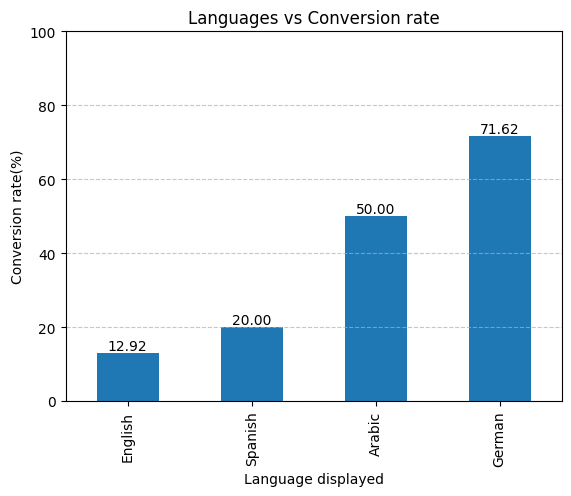

In [6]:
language_conversion_rate = conversion_rate(marketing,'language_displayed')

ax=language_conversion_rate.sort_values().plot(kind='bar')
for i, value in enumerate(language_conversion_rate.sort_values()):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Language displayed')
plt.ylabel('Conversion rate(%)')
plt.title('Languages vs Conversion rate')
plt.ylim(plt.ylim([0, 100]))
plt.grid(True, axis='y',linestyle='--', alpha=0.7)
plt.show()

***
### **7. Marketing channels across age groups** </br>
To determine if marketing channels are reaching all age demographics equally or if certain channels are more effective at targeting specific age groups - by visualizing the distribution of users across marketing channels and age groups.

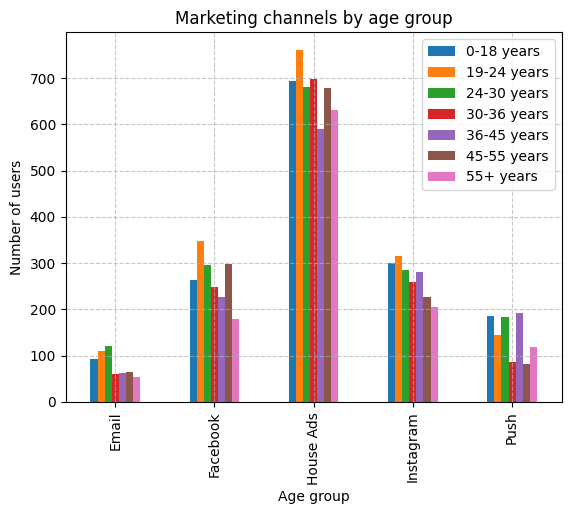

In [7]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age group')
plt.ylabel('Number of users')
plt.legend(labels = channel_age_df.columns.values, loc = 'upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Observation:**
- House Ads is the most marketing effective channel for all age groups.

***
### **8. Retention rate by marketing channel**
To find which channel had the best retention rate from the campaign. It is important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

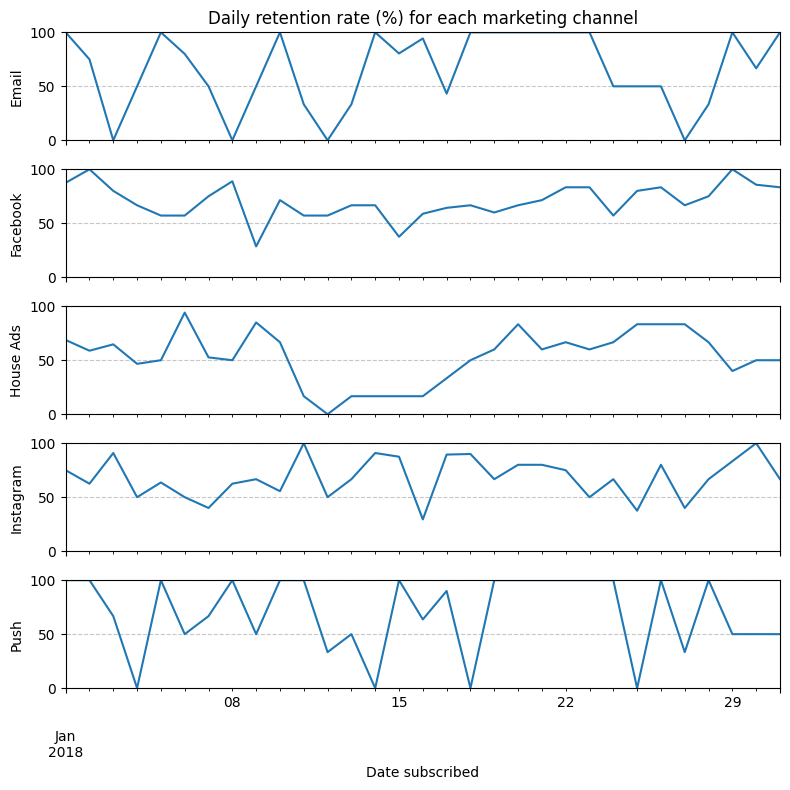

In [8]:
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
retention_rate = round(retention_subs/retention_total*100,2)
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1)).fillna(0)

fig, axes = plt.subplots(len(retention_rate_df.columns), 1, figsize=(8, 8), sharex=True)
for i, channel in enumerate(retention_rate_df.columns):
    retention_rate_df[channel].plot(ax=axes[i])
    axes[i].set_xlabel('Date subscribed')
    axes[i].set_ylabel(f'{channel}')  
    axes[i].set_ylim([0, 100])
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
axes[0].set_title(f'Daily retention rate (%) for each marketing channel')
plt.tight_layout()
plt.show()

***
### **9. Conversion rate plots for each age group** 
Calculate and visualize the conversion rate for each age group over time. 

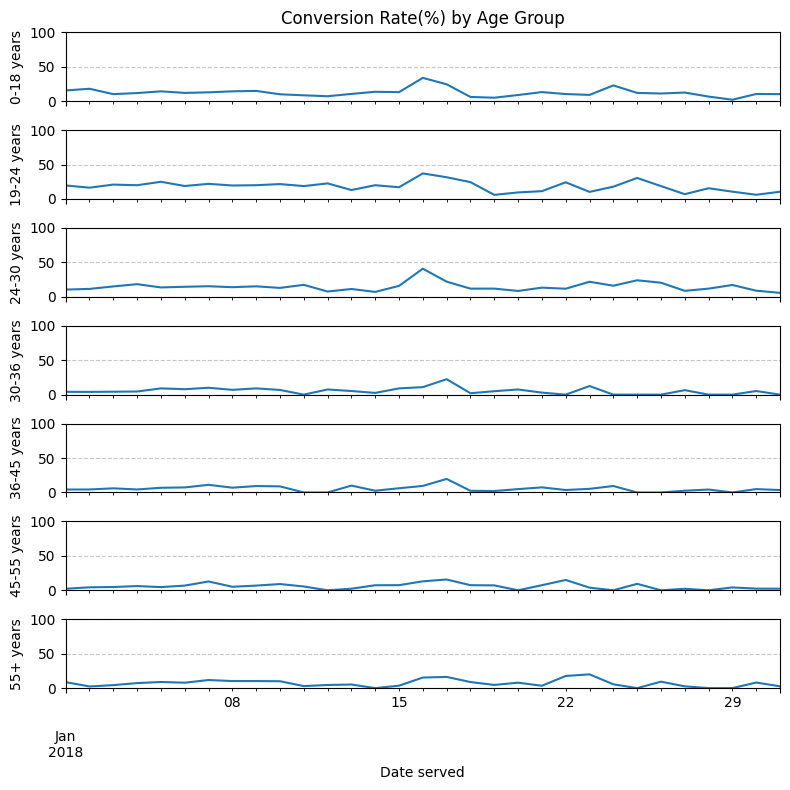

In [9]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

fig, axes = plt.subplots(len(age_group_df.columns), 1, figsize=(8, 8), sharex=True)

for i, age_group in enumerate(age_group_df.columns):
    age_group_df[age_group].plot(ax=axes[i])
    axes[i].set_ylabel(f'{age_group}')
    axes[i].set_xlabel('Date served')
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Age Group')
plt.tight_layout()
plt.show()

***
### **10. Conversion rate for each marketing channel by date served**

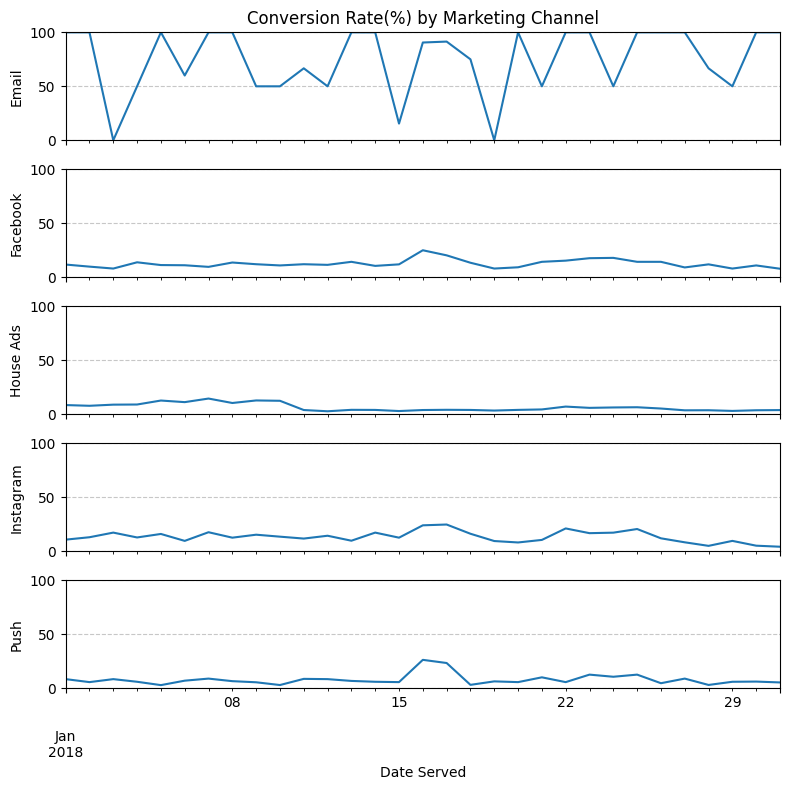

In [10]:
daily_conv_channel = conversion_rate(marketing,['date_served','marketing_channel'])
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

fig, axes = plt.subplots(len(daily_conv_channel.columns), 1, sharex=True, figsize=(8, 8))
for i, channel in enumerate(daily_conv_channel.columns):
    daily_conv_channel[channel].plot(ax=axes[i])
    axes[i].set_ylabel(f'{channel}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Marketing Channel')
axes[-1].set_xlabel('Date Served')
plt.tight_layout()
plt.show()

**Observation:**
-  Sudden decrease in conversion rate for House Ads on January 11

***
### **11. Influence of day of week on conversion rate for house-ads**
To check whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

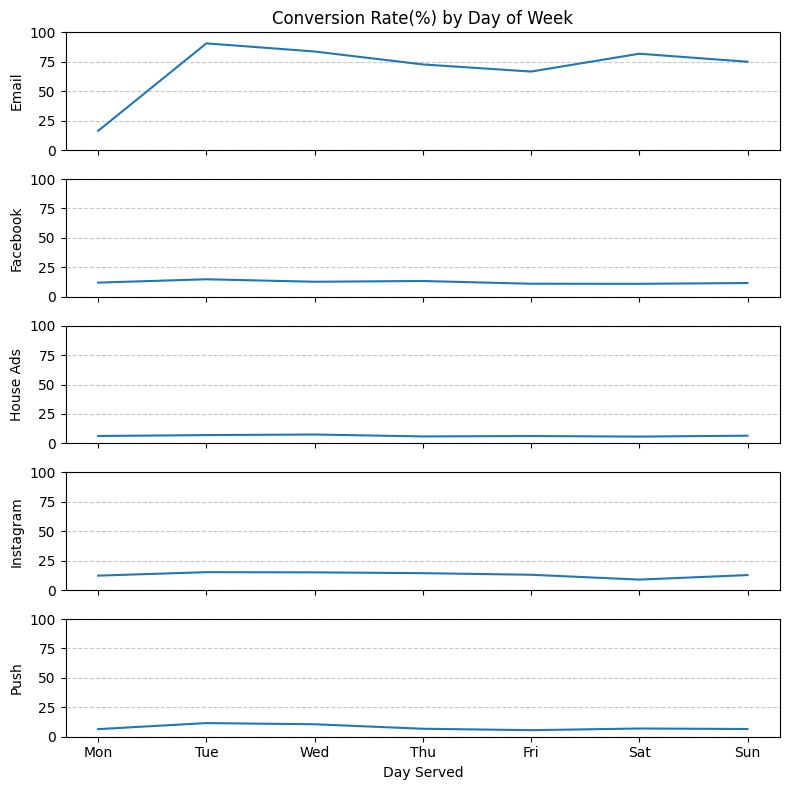

In [11]:
marketing['DoW_served'] =marketing['date_served'].dt.dayofweek
DoW_conversion = conversion_rate(marketing, ['DoW_served','marketing_channel'] )
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

fig, axes = plt.subplots(len(DoW_df.columns), 1, sharex=True, figsize=(8, 8))
for i, channel in enumerate(DoW_df.columns):
    DoW_df[channel].plot(ax=axes[i])
    axes[i].set_ylabel(f'{channel}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Conversion Rate(%) by Day of Week')
axes[-1].set_xlabel('Day Served')
axes[-1].set_xticks(range(7))
axes[-1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

**Observations**: 
- Email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday.
- It is ruled out that day of week has no influence on house-ads conversion rate.

***
### **12. House ads conversion by language**
To check if conversion rate for House-Ads is affected by language preferences. 

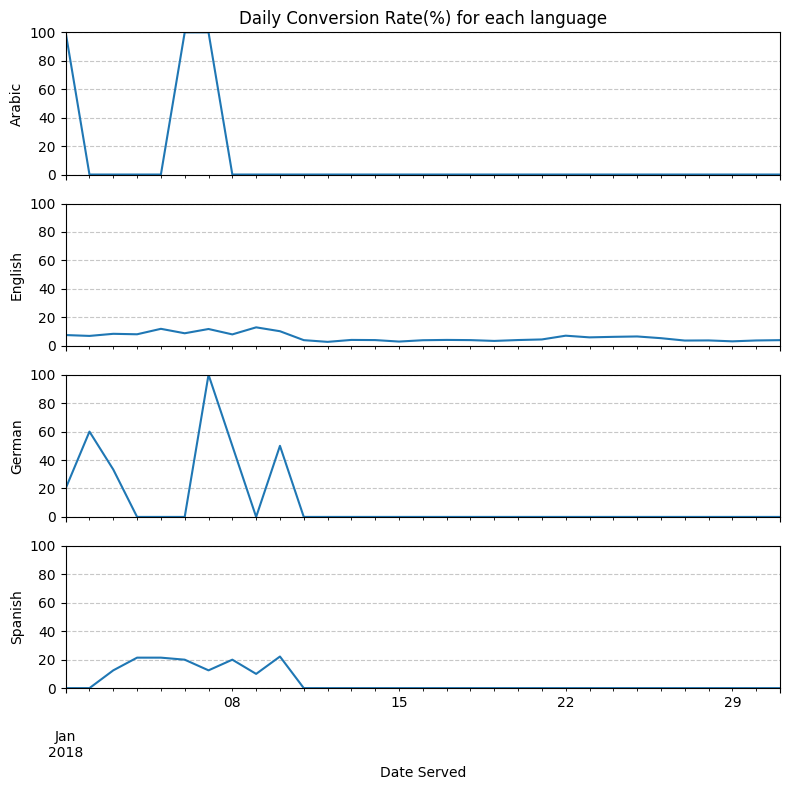

In [12]:
house_ads = marketing[marketing['marketing_channel']=='House Ads']
conv_lang = conversion_rate(house_ads,['date_served','language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang.unstack(level=1)).fillna(0)

fig, axes = plt.subplots(len(conv_lang_df.columns), 1, sharex=True, figsize=(8, 8))
for i, lang in enumerate(conv_lang_df.columns):
    conv_lang_df[lang].plot(ax=axes[i])
    axes[i].set_ylabel(f'{lang}')
    axes[i]
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim([0, 100])
axes[0].set_title('Daily Conversion Rate(%) for each language')
axes[-1].set_xlabel('Date Served')
plt.tight_layout()
plt.show()

**Observation:** 
- English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

***
### **13. Deeper analysis of language discrepancy**
Check whether users see ads in the correct language - calculate what percentage of users were being served ads in the right language and plot the results.

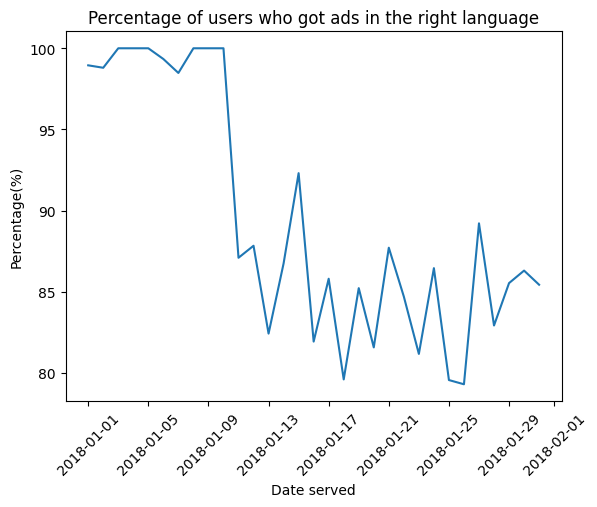

In [13]:
pd.set_option('mode.chained_assignment', None)
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
language_check_df['pct'] = round((language_check_df['Yes'] / language_check_df.sum(axis=1))*100,2)
plt.plot(language_check_df.index, language_check_df['pct'])
plt.xlabel('Date served')
plt.xticks(rotation=45)
plt.ylabel('Percentage(%)')
plt.title("Percentage of users who got ads in the right language")
plt.show()

**Observation**:
- House ads have been underperforming due to serving all ads in English rather than each user's preferred language.

***
### **14. Conversion indexes for language and analyze bug impact**
- Language is the issue with House Ads conversion. To analyze how many subscribers were lost as a result of this bug on Jan 11.
- Index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [14]:
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.6821392532795159
Arabic index: 5.045408678102926
German index: 4.484359233097881


To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In [15]:
converted = house_ads.groupby(['date_served','language_preferred']).agg({'user_id':'nunique', 'converted':'sum'})
converted = pd.DataFrame(converted.unstack(level=1))

converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]/converted.loc['2018-01-11':'2018-01-31'][('user_id','English')]
converted['expected_spanish_rate'] = converted['english_conv_rate'] * spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate'] * arabic_index
converted['expected_german_rate'] = converted['english_conv_rate'] * german_index

converted['expected_spanish_conv'] = converted['expected_spanish_rate']* converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']* converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']* converted[('user_id','German')]

converted = converted.loc['2018-01-11':'2018-01-31']

expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

lost_subs = expected_subs - actual_subs
print("Number of subscribers lost = ", round(lost_subs))

Number of subscribers lost =  24


***
### **15. A/B Test Allocation**
- Email campaign was run as A/B test.
- Half emails - generic and half emails - personalized messaging
- Check to ensure users were allocated equally to the test and control groups.

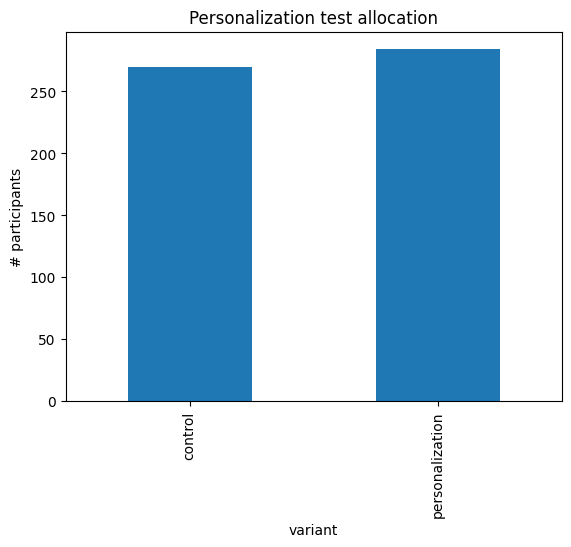

In [16]:
email = marketing[marketing['marketing_channel']=='Email']
alloc = email.groupby('variant')['user_id'].nunique()
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

***
### **16. Email conversion rates**
- Evaluate whether or not conversion was higher in the personalization treatment compared with the control.


In [17]:
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

control = subscribers_df['control'].dropna()

personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Observation**: 
- Personalization converted users at a higher rate than the control.

***
### **17. Lift function**
- Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control.

In [18]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
print("Lift = " ,lift(control, personalization))

print(ttest_ind(control.astype(int), personalization.astype(int)))

Lift =  38.85%
TtestResult(statistic=np.float64(-2.734329944750507), pvalue=np.float64(0.006451487844694182), df=np.float64(552.0))


**Observation**:
- Large lift
- Statistically significant with p=0.006

***
### **17. A/B test segmentation function**


In [19]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control,personalization)) 
      print('t-statistic:', ttest_ind(control.astype(int), personalization.astype(int)), '\n\n')

ab_segmentation('language_displayed')

ab_segmentation('age_group')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=np.float64(-0.5773502691896255), pvalue=np.float64(0.5795840000000001), df=np.float64(8.0)) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=np.float64(-2.2183598646203215), pvalue=np.float64(0.026991701290720503), df=np.float64(486.0)) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=np.float64(0.19100834180787182), pvalue=np.float64(0.8494394170062677), df=np.float64(42.0)) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=np.float64(-2.3570226039551585), pvalue=np.float64(0.040156718110477524), df=np.float64(10.0)) 


0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=np.float64(-2.966044912142212), pvalue=np.float64(0.003872449439129706), df=np.float64(89.0)) 


19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=np.float64(-3.0317943847866697), pvalue=np.float64(0.00306238361146892), df=np.float64(105.0)) 


24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=np.float64(-3.8

c:\Users\dipid\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


lift: -72.22%
t-statistic: TtestResult(statistic=np.float64(2.0654991273179326), pvalue=np.float64(0.04306233968820123), df=np.float64(62.0)) 


55+ years
lift: -100.0%
t-statistic: TtestResult(statistic=np.float64(3.326565456420339), pvalue=np.float64(0.001635862345636047), df=np.float64(51.0)) 


